In [1]:
import pandas as pd
import numpy as np

# Enable interactive Matplotlib plots in the notebook
# %matplotlib qt5


import matplotlib.pyplot as plt
from matplotlib import cm
import os
# import astropy.convolution as krn
# import scipy.stats as stats
import sys

import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import ast   
import re
import matplotlib.patches as patches
import matplotlib.image as mpimg  
import matplotlib.colors as mcolors

# import DeepEye analysis package
from deepeyeAnalyze import getFixationLatency, handle_carryover_fixations_and_merge, addAOI



# Get latency of all fixations and their order in a trial

### Plotting function

In [2]:
def draw_bbox(ax, bboxes_coords, colormap='viridis', offset_left=0, offset_top=0, padding=0):

    # get coordinates for the bounding box for congruent and incongruent objects
    if isinstance(bboxes_coords, str):
        bboxes_coords = ast.literal_eval(bboxes_coords)
    
    # Ensure bboxes_coords is a list of lists
    if all(isinstance(coord, (int, float)) for coord in bboxes_coords):
        bboxes_coords = [bboxes_coords]  

    # print(f'Bounding boxes: {bboxes_coords}')  

    # Generate a colormap
    cmap = plt.colormaps[colormap]
    colors = cmap(np.linspace(0, 1, len(bboxes_coords)))          
    
    for idx, bbox_coords in enumerate(bboxes_coords):
        
        bbox_left = offset_left + float(bbox_coords[0])  # adjust based on the scene location
        bbox_top = offset_top + float(bbox_coords[1])  # adjust based on the scene location
        bbox_width = float(bbox_coords[2])
        bbox_height = float(bbox_coords[3])            

        # Draw a rectangle with padding (if specified)
        rect = patches.Rectangle((bbox_left-padding, bbox_top-padding), bbox_width + padding*2, bbox_height + padding*2, 
                            fill=False,
                            edgecolor=colors[idx],
                            linewidth=2)
        
        ax.add_patch(rect)

    return 'done'

def draw_stimuli(ax, img_paths, img_coords, path_to_analysis):

    # Remove the last directory from the path
    new_path = os.path.dirname(path_to_analysis) 
    
    for img_path, img_coord in zip(img_paths, img_coords):
        # Join the main path with path to stimuli
        img_path_full = os.path.join(new_path, img_path)
        
        # Load the images
        image = mpimg.imread(img_path_full)
        
        # Define the image extent (left, right, bottom, top) in data coordinates
        left = img_coord[0]
        top = img_coord[1]
        width = img_coord[2]
        height = img_coord[3]
        extent = [left, left+(width), top+(height), top]
        
        # Plot the image at specific coordinates
        ax.imshow(image, extent=extent)
    
    return 'done'

def plot2d(df, fn, path_to_analysis, condition=None, bboxes=True, stimuli=True, save=True):

    # iterate over the frames for each trial 
    for trialNr, group in df.groupby('trialNr'):
        
        fig, ax = plt.subplots()
        plt.style.use('ggplot')
        plt.grid(False)
        if condition:
            title = group[condition].iloc[0]
            plt.title(f'{fn}_{title}_trial{int(trialNr)}') 
        else:
            title = ''
       
        if stimuli:
            # draw stimuli        
            draw_stimuli(ax, group.image_paths.iloc[0],
                            group.image_coords.iloc[0], path_to_analysis)

        if bboxes:
            # draw bounding boxes and offset them based on the scene location
            padding = group.padding.iloc[0] # padding around the bounding box
            draw_bbox(ax, group.bboxes.iloc[0], colormap='viridis', padding=padding)    

        # Plot the raw eye samples
        raw_h = plt.scatter(group.user_pred_px_x, group.user_pred_px_y, c='orange', alpha=0.5, edgecolors='black')

        # remove no fixations/saccades (zeros) and plot the fixations
        fix_h = plt.scatter(group.FixXPos[group.FixXPos>0], group.FixYPos[group.FixYPos>0], c='blue', alpha=0.5, edgecolors='black')

        # set the limits of the plot
        plt.xlim((0, df.resX.iloc[0]))
        plt.ylim((df.resY.iloc[0]), 0)

        # set the axis labels
        plt.xlabel('Horizontal eye position (pixels)')
        plt.ylabel('Vertical eye position (pixels)')

        plt.legend((raw_h, fix_h), ('raw samples', 'fixations'), scatterpoints=1)    

        if save:
            # save figure        
            plt.savefig(os.path.join(path_to_analysis, f'{fn}_{title}_{int(trialNr)}'), dpi=300, pad_inches=0)        
            plt.close()      
            


### Read in the data

Directory 'C:/Users/aby600/Dropbox/Appliedwork/CognitiveSolutions/Projects/DeepEye/TechnicalReports/TechnicalReport1/Test_PreferentialViewing/Pilot_PreferentialViewing/Young/Approved\analysis_new' already exists.
Processing participant 2024_01_15_11_44_18...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_12_03_52...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_14_08_56...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_14_19_20...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_15_09_08...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_15_49_33...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_15_57_52...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_16_26_53...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_16_38_59...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_17_01_45...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_17_11_36...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_17_29_15...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_17_43_23...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_15_18_08_09...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_26_13_09_05...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_26_14_16_01...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_26_14_25_48...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_26_14_53_12...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_26_15_38_25...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_26_17_16_28...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_27_13_26_23...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Processing participant 2024_01_27_14_22_06...


C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['padding'] = padding
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deepeye_id'] = fn
C:\Users\aby600\AppData\Local\Temp\ipykernel_20640\1522929918.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Error in callback <function _draw_all_if_interactive at 0x0000020DADFE93F0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

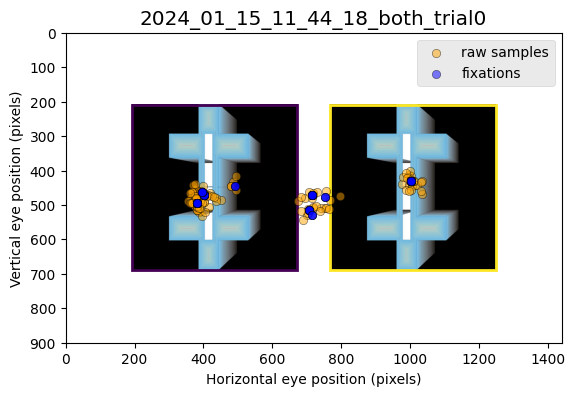

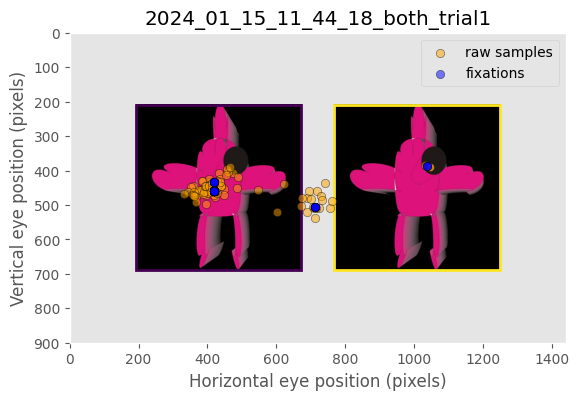

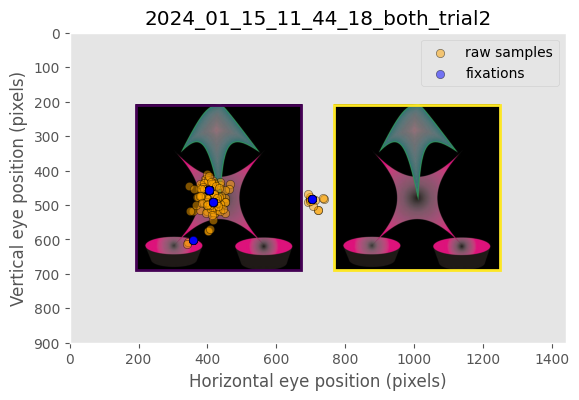

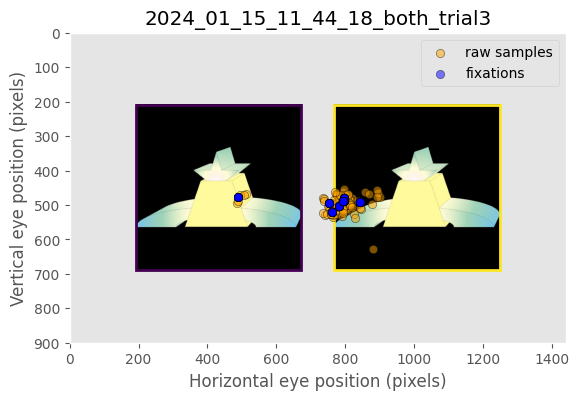

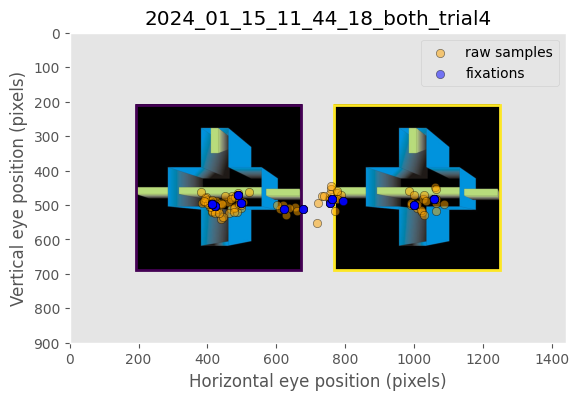

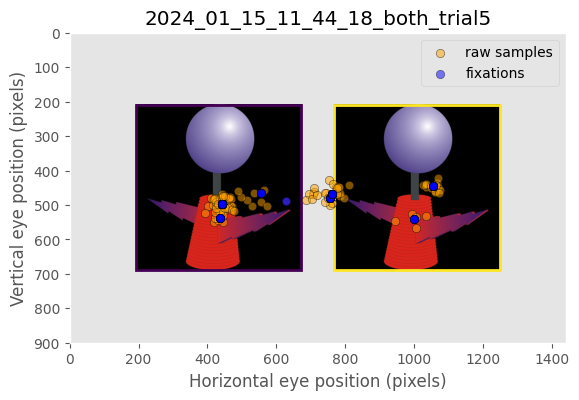

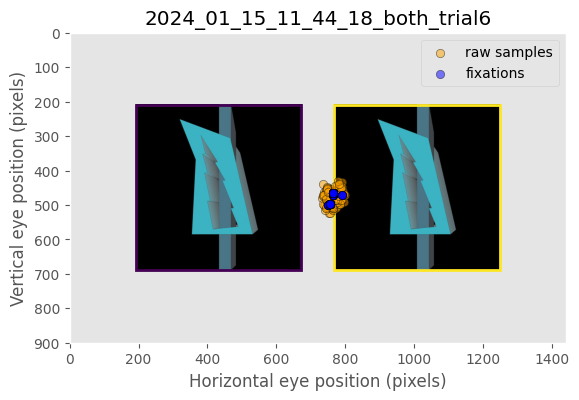

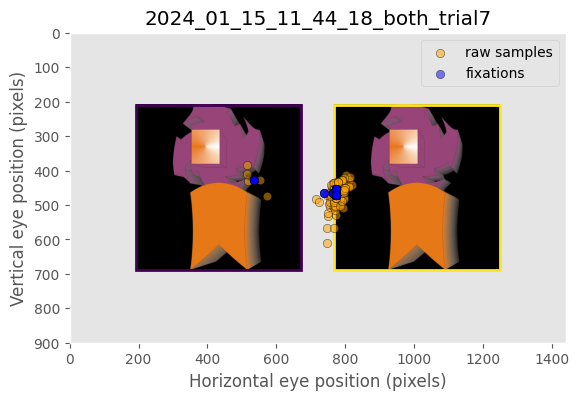

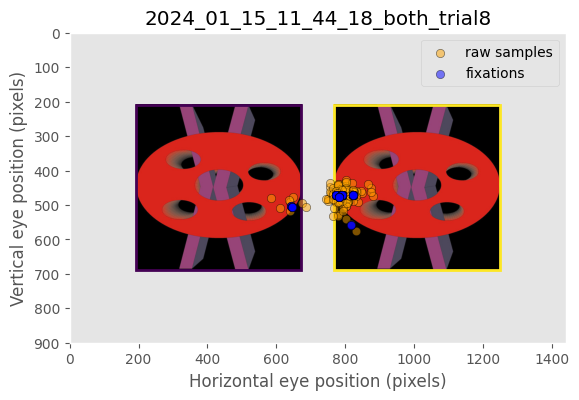

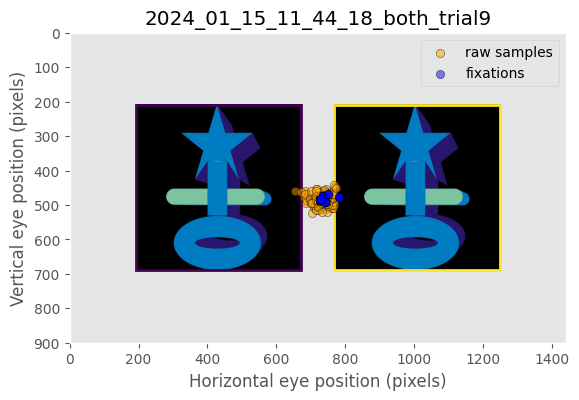

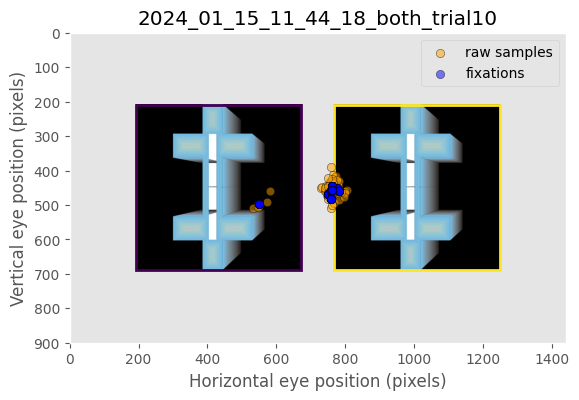

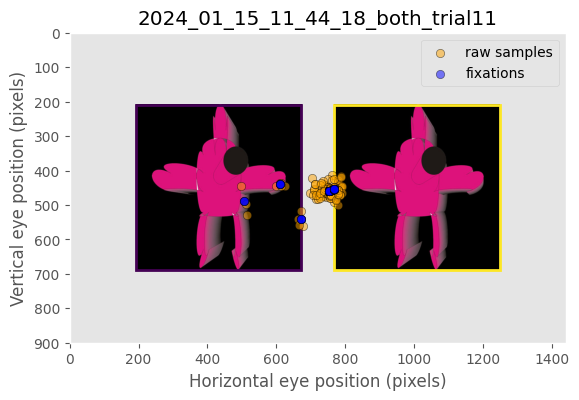

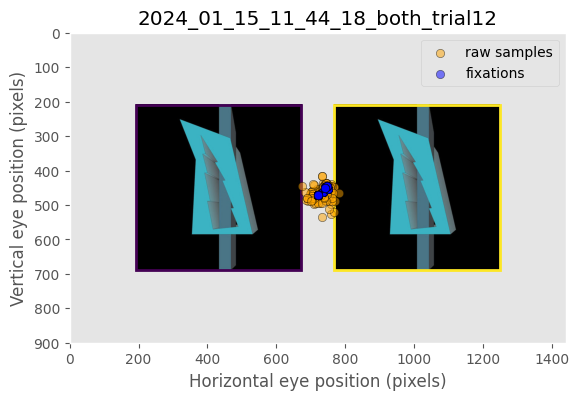

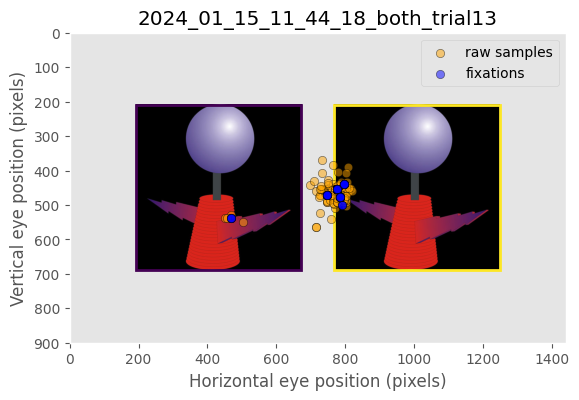

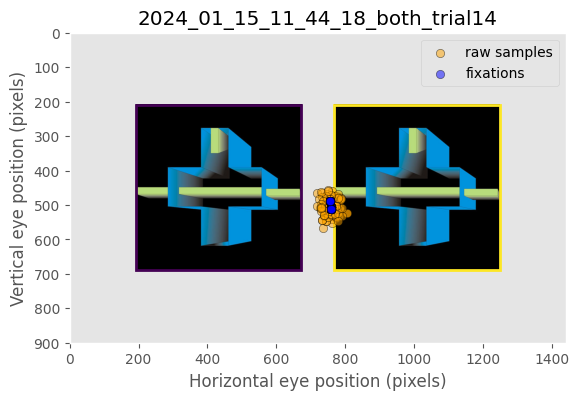

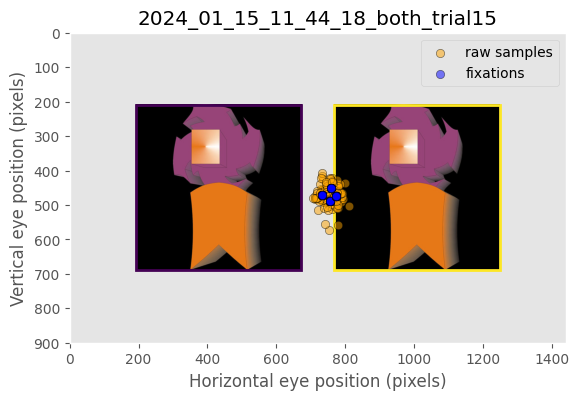

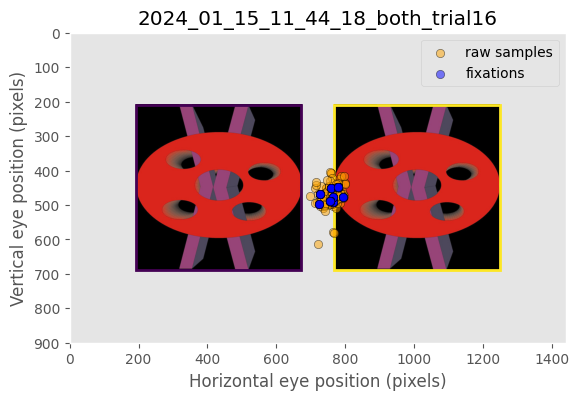

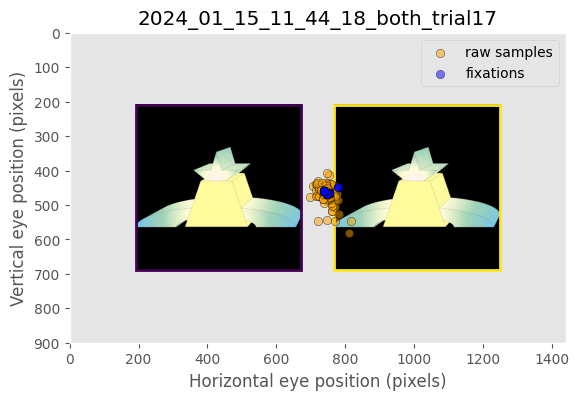

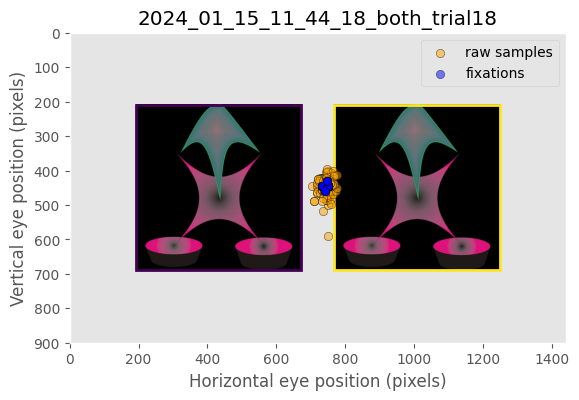

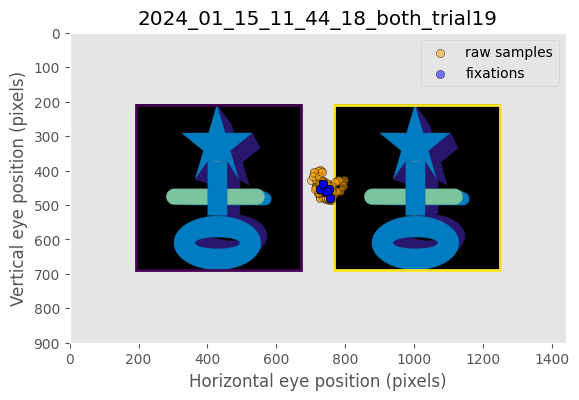

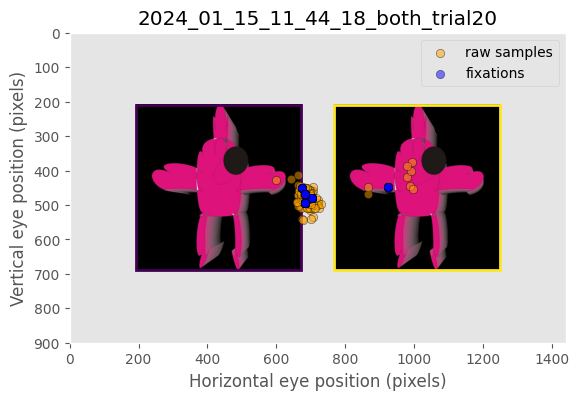

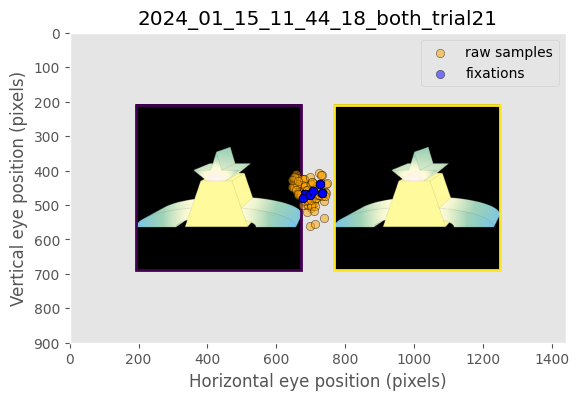

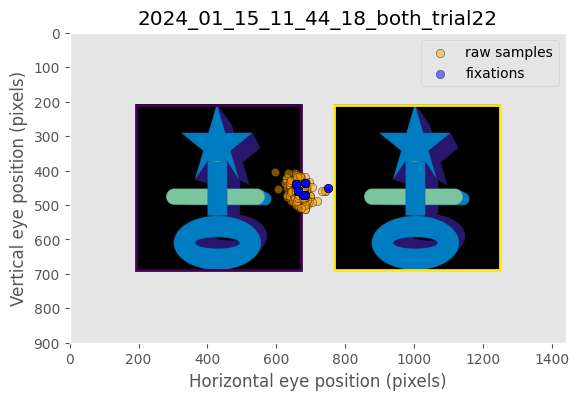

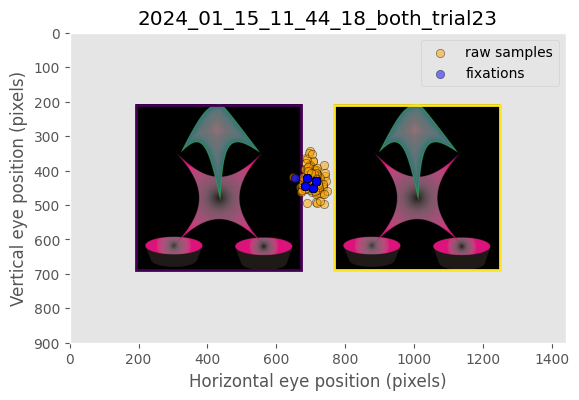

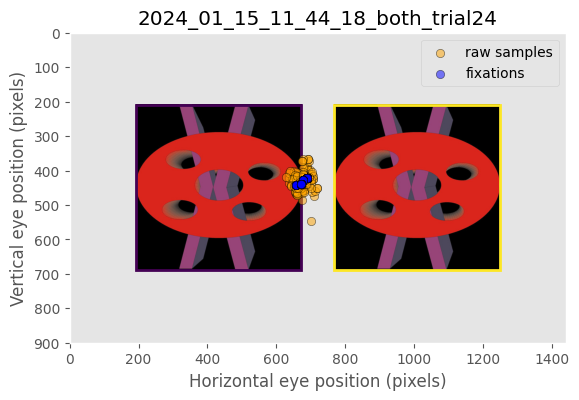

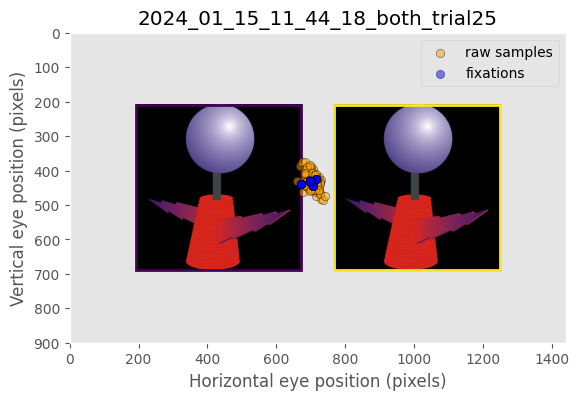

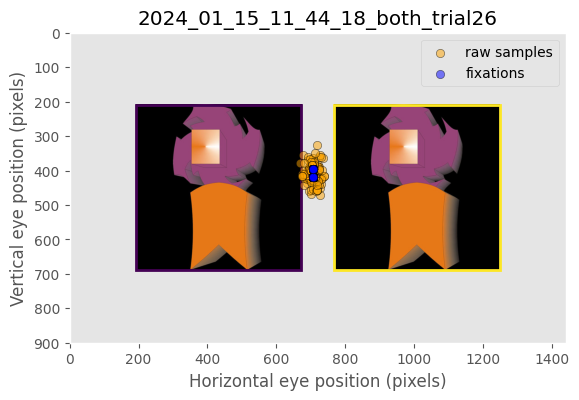

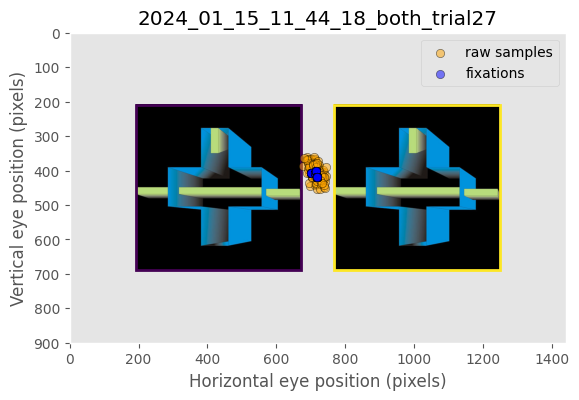

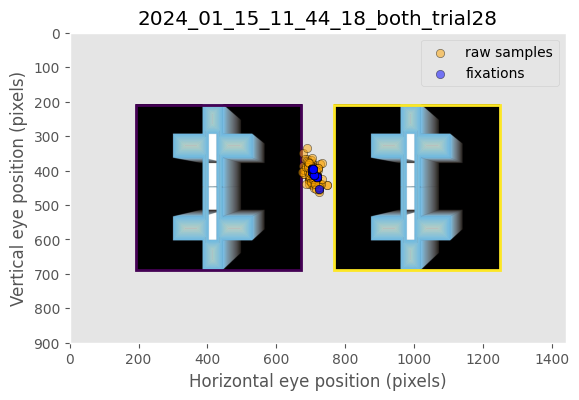

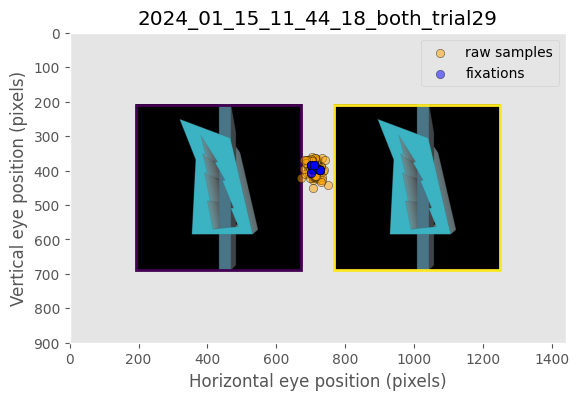

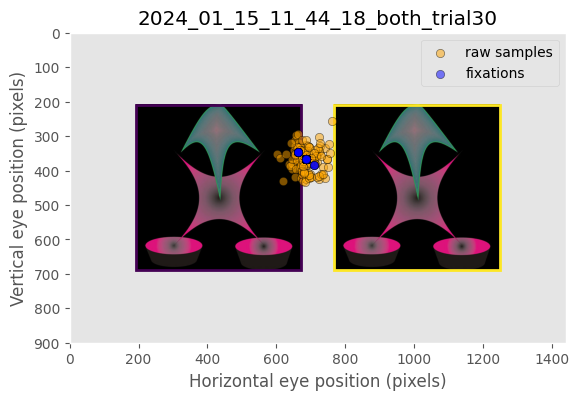

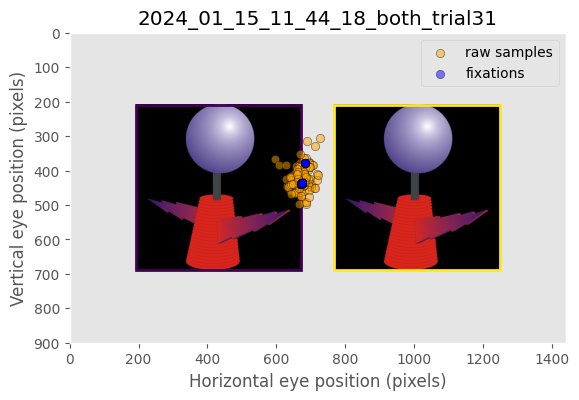

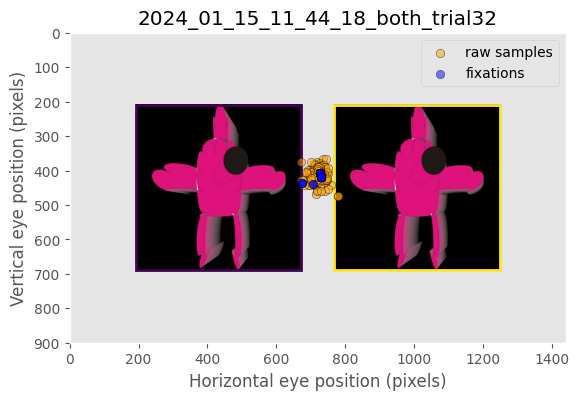

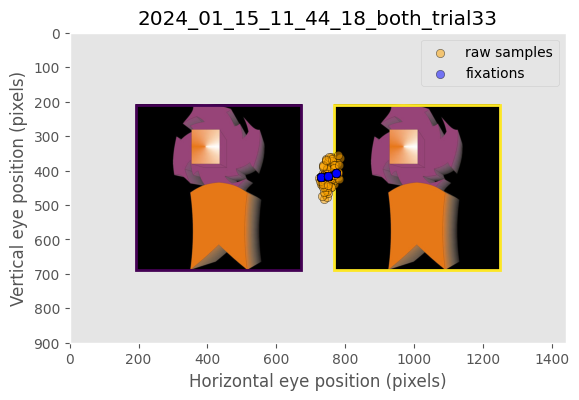

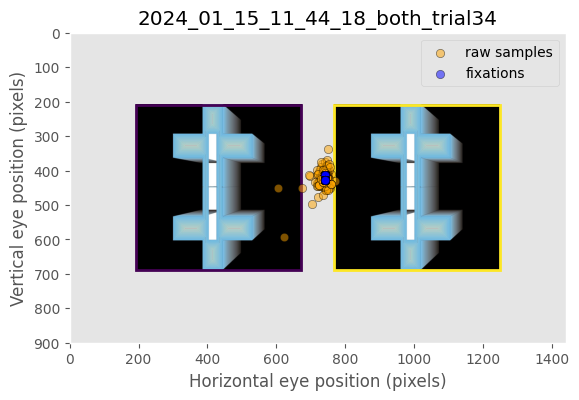

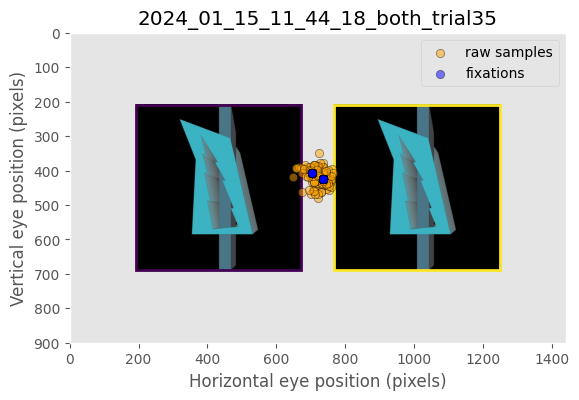

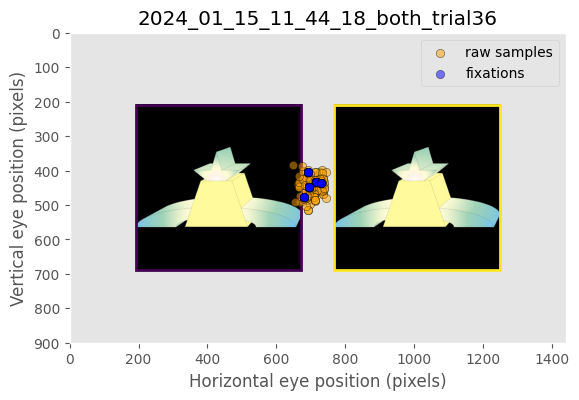

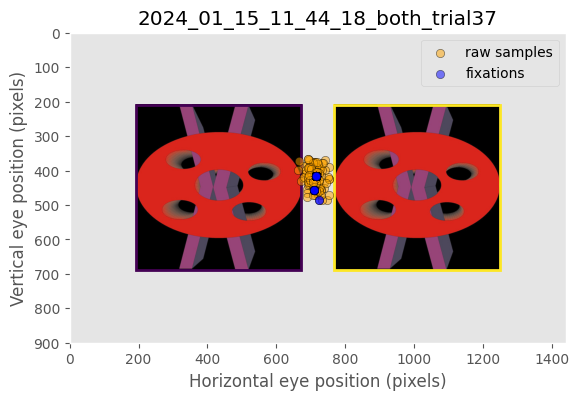

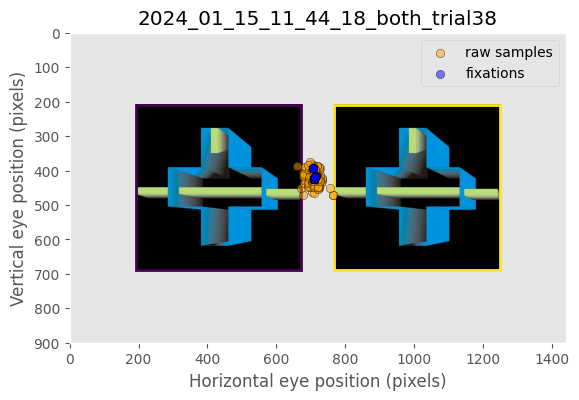

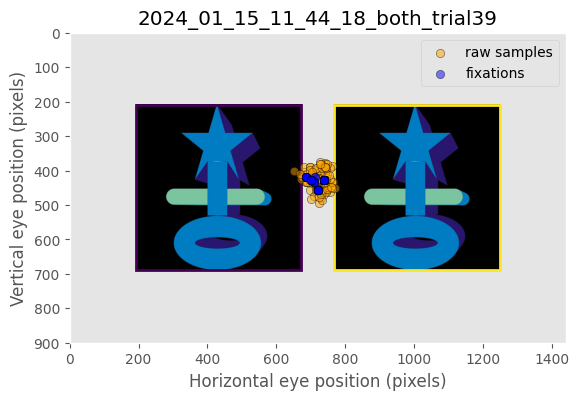

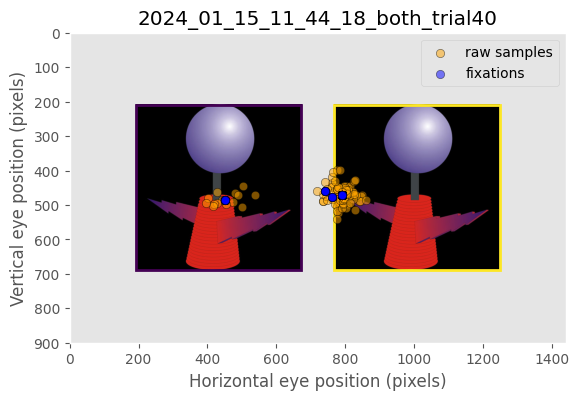

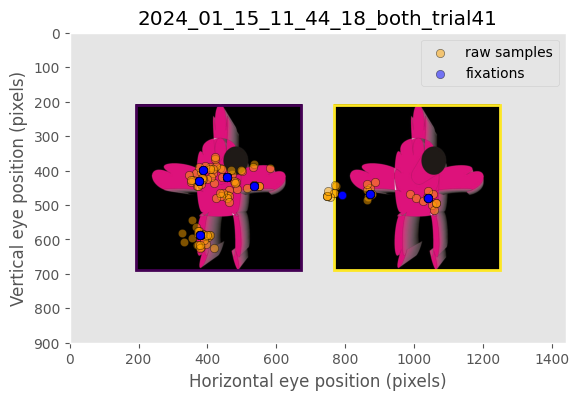

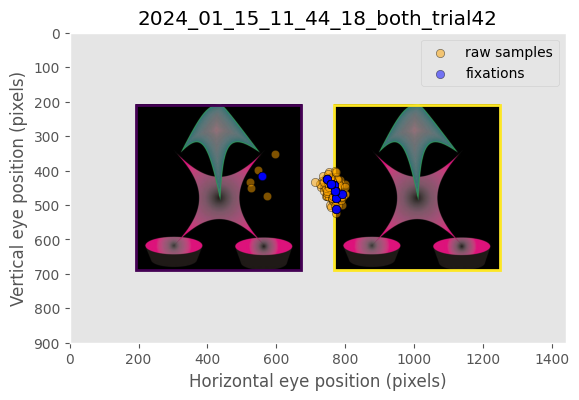

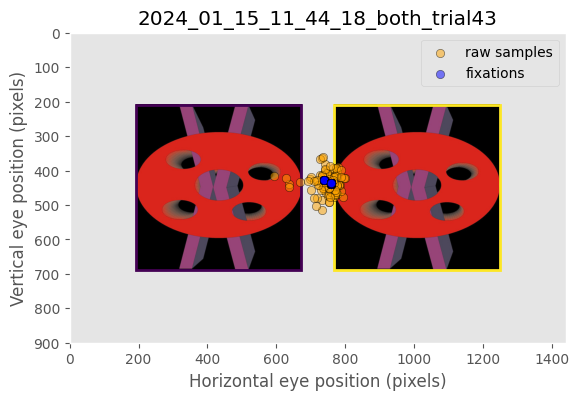

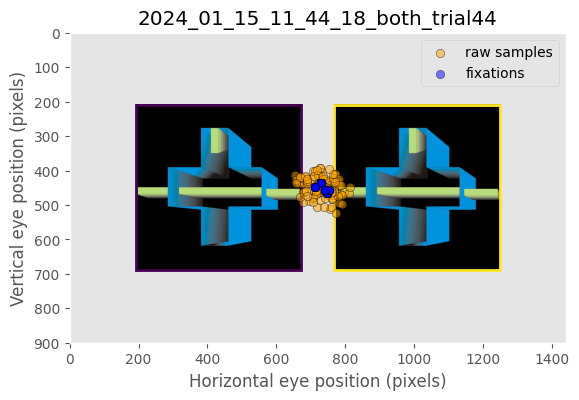

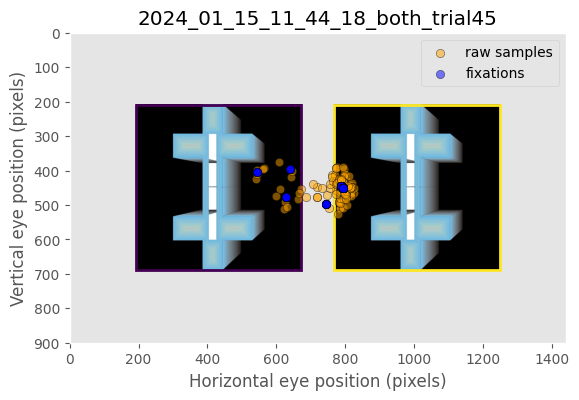

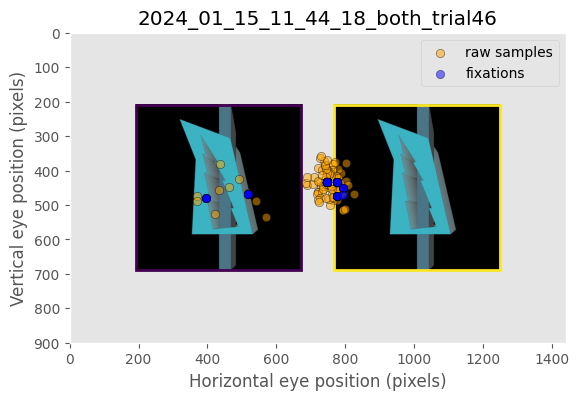

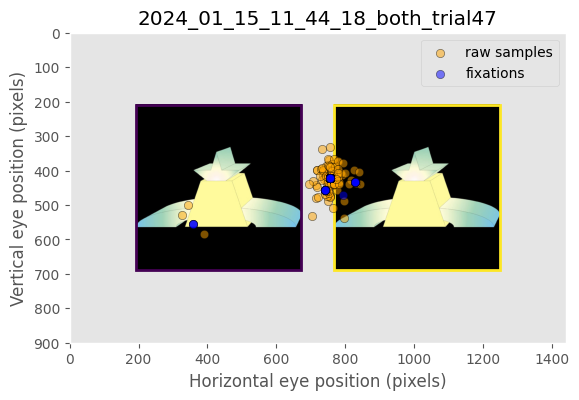

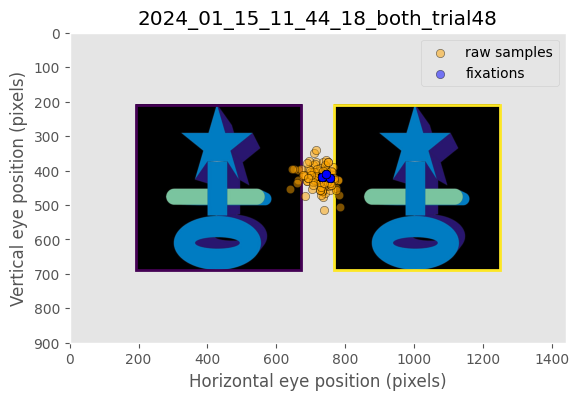

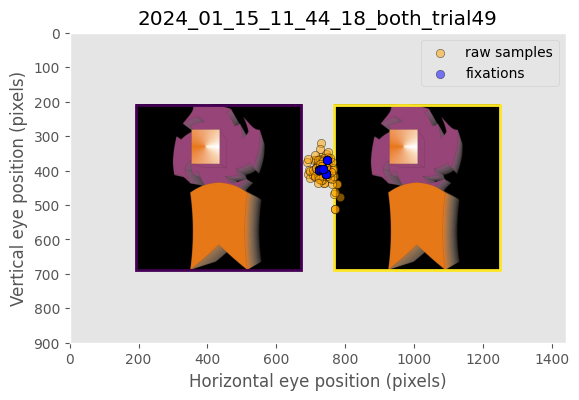

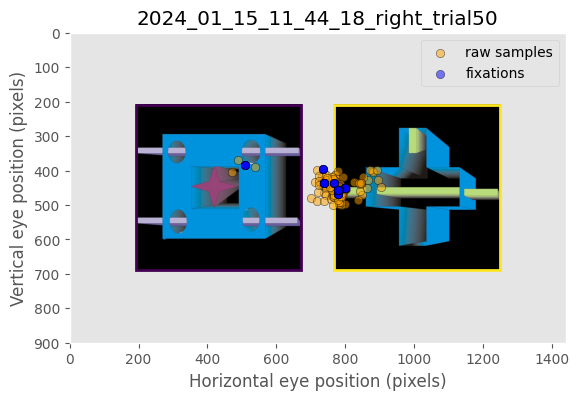

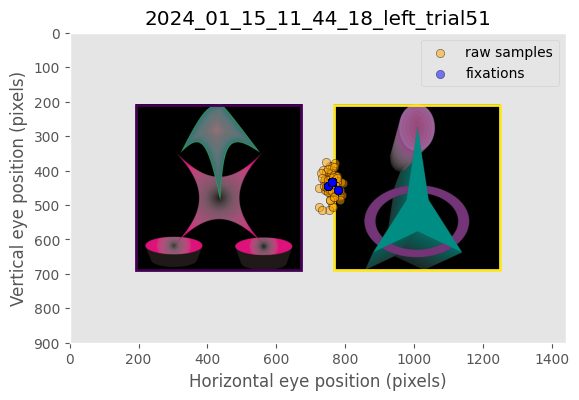

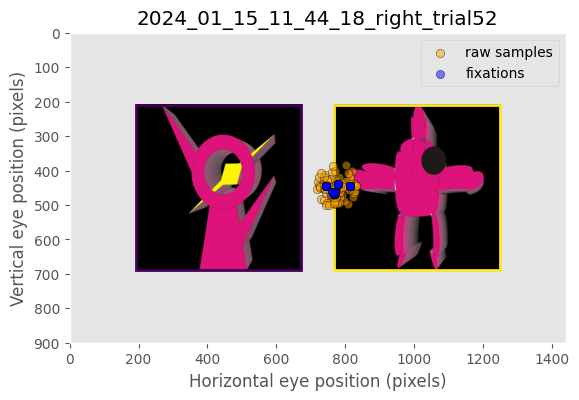

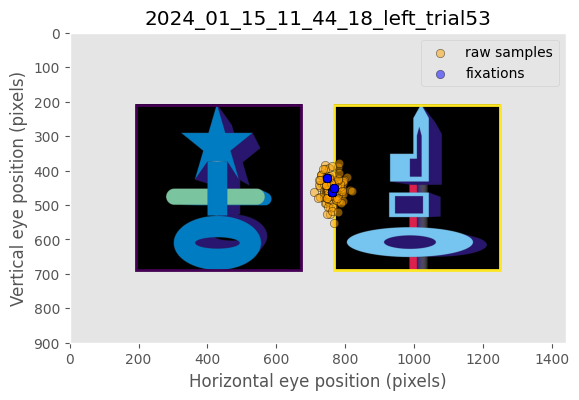

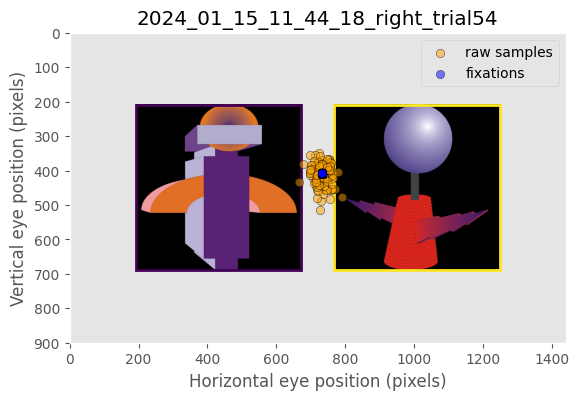

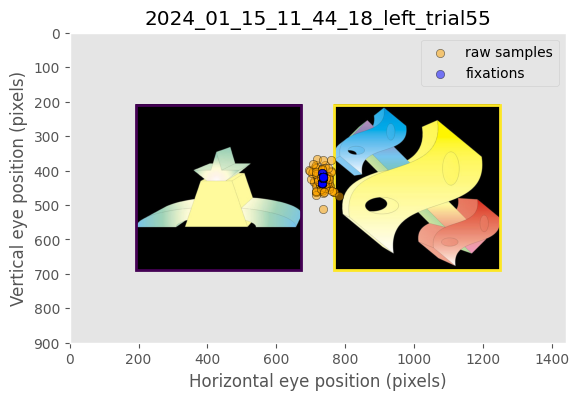

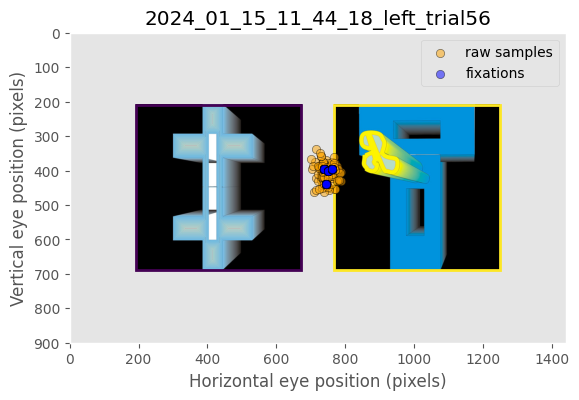

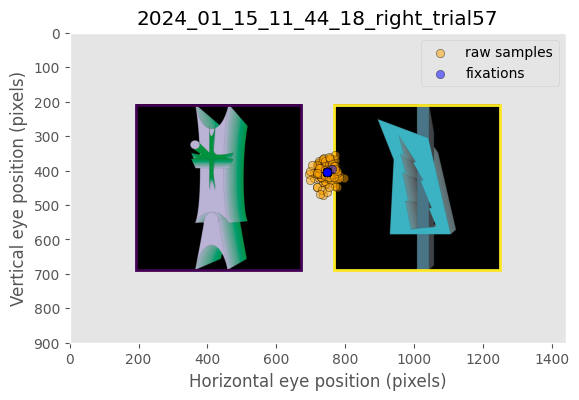

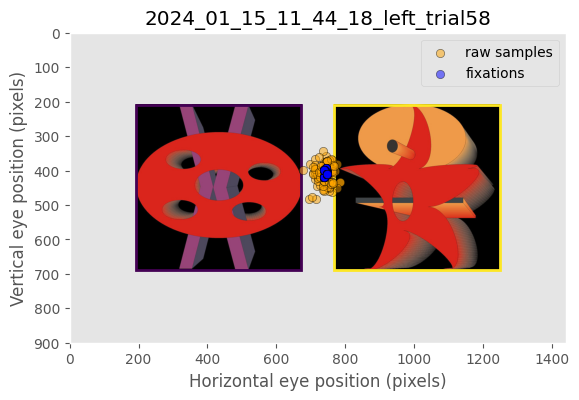

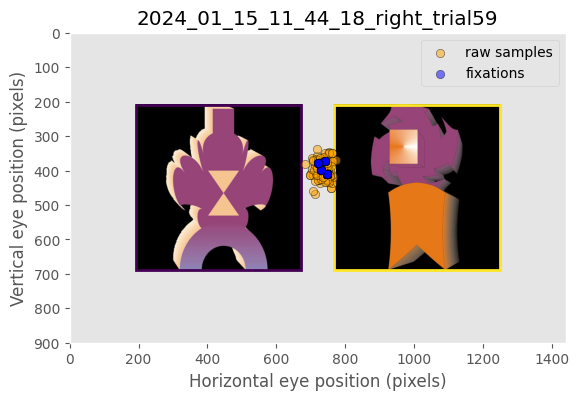

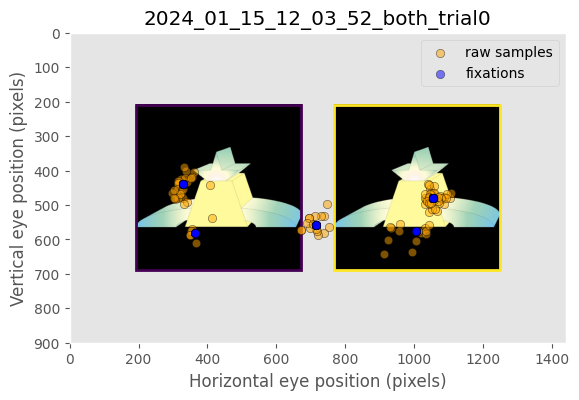

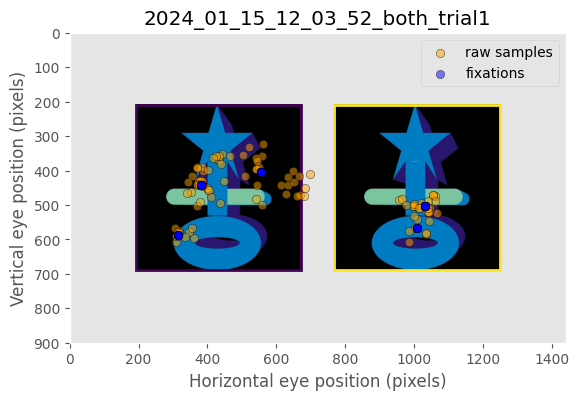

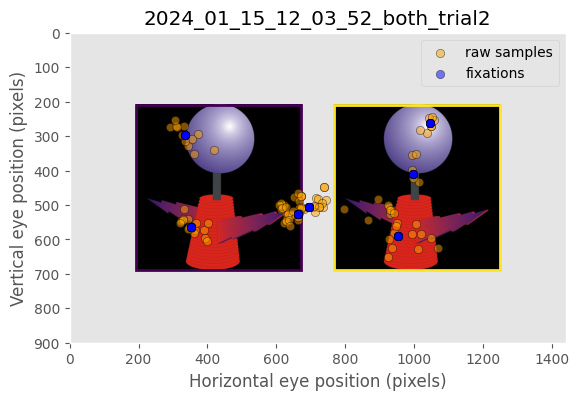

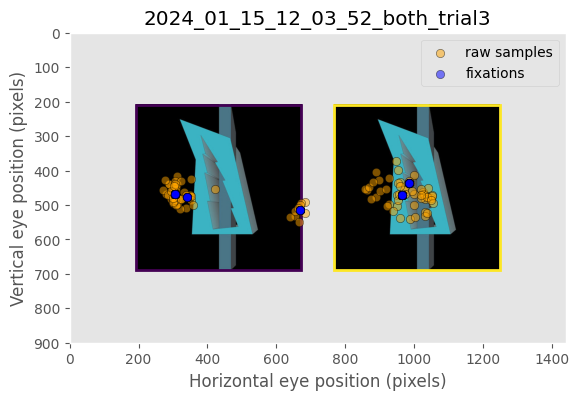

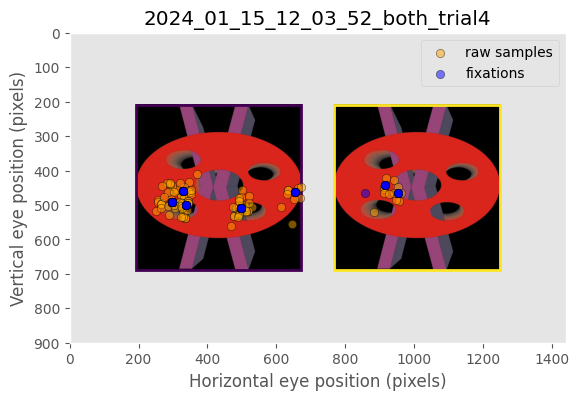

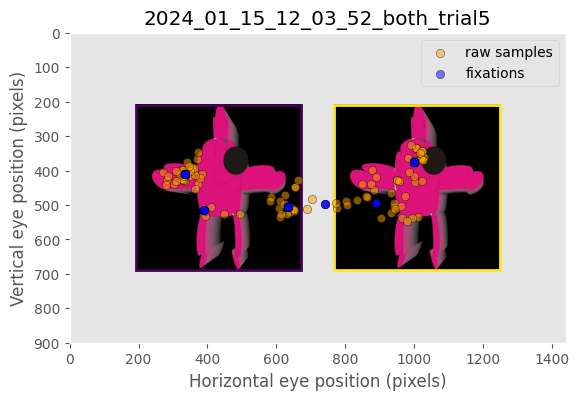

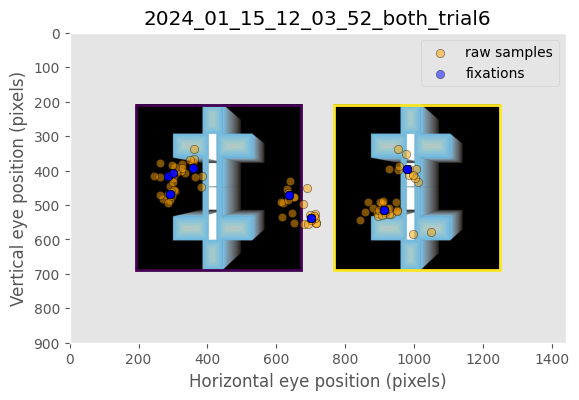

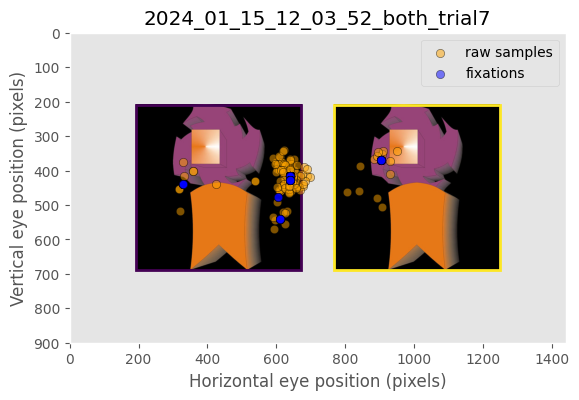

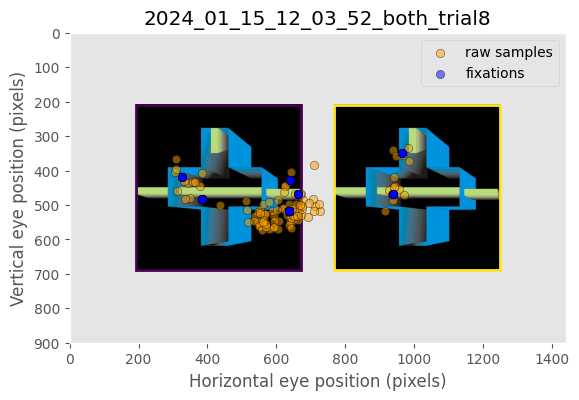

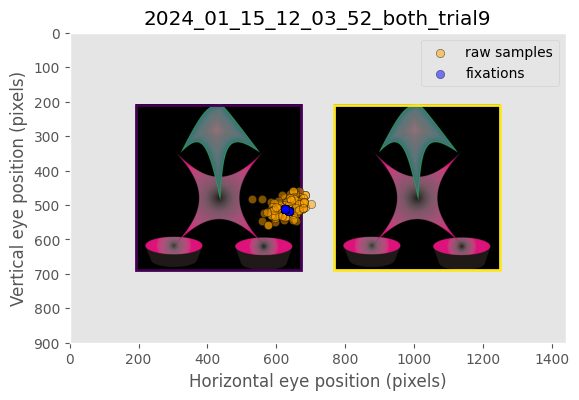

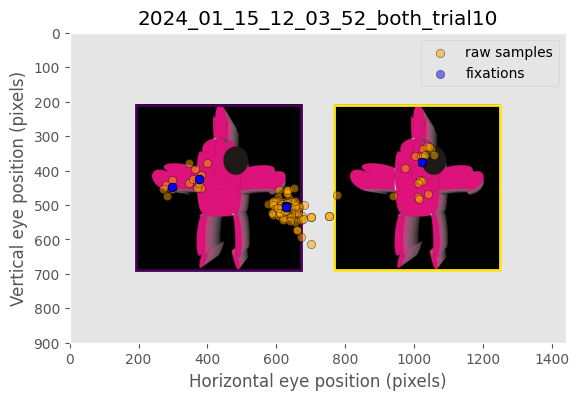

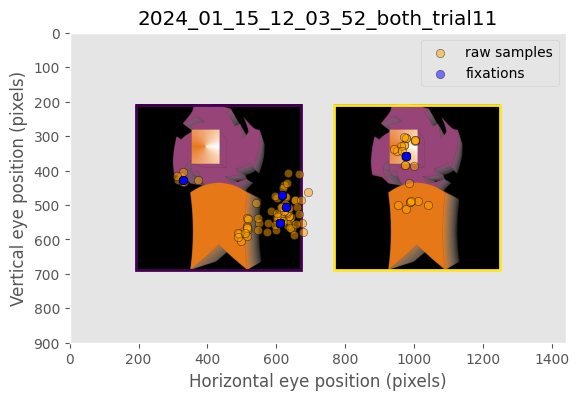

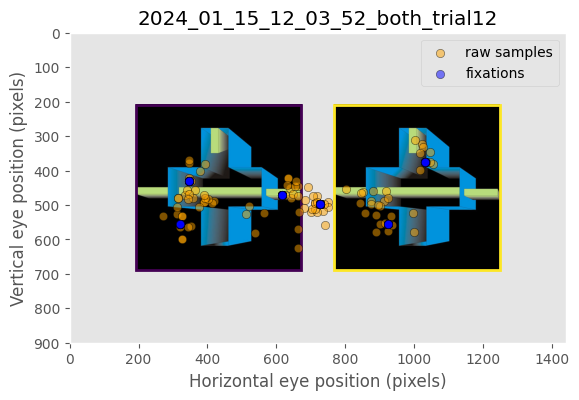

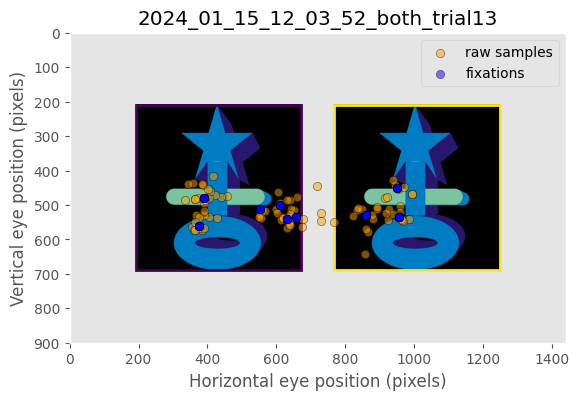

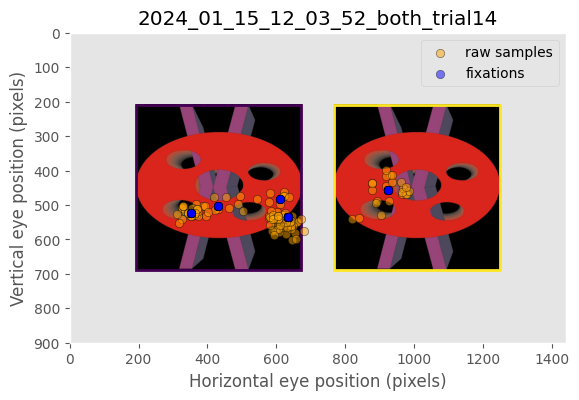

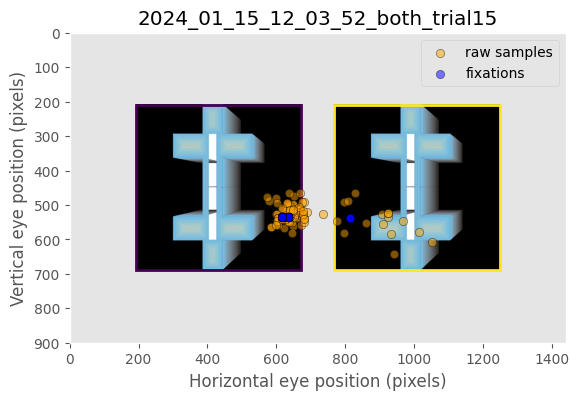

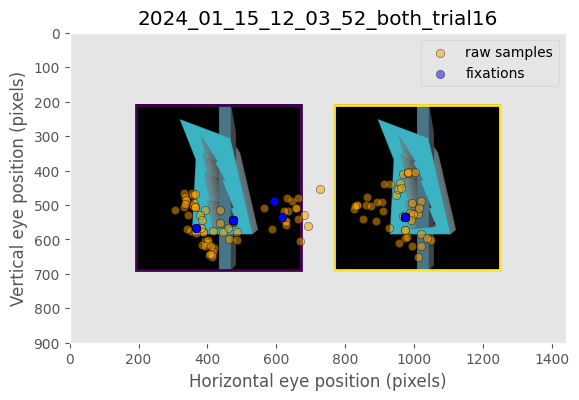

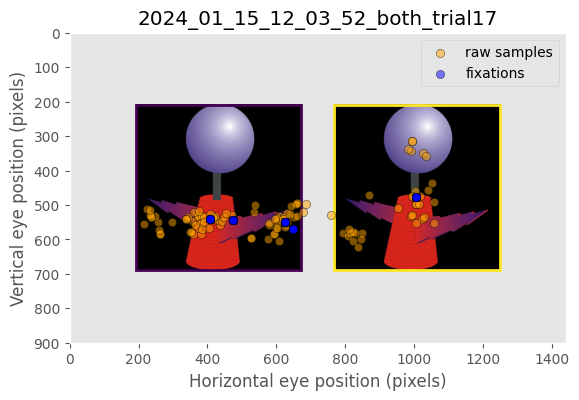

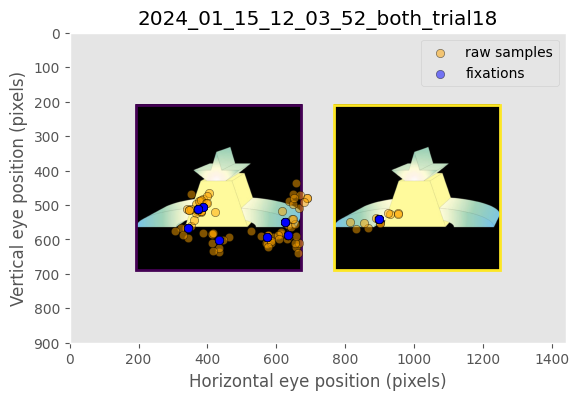

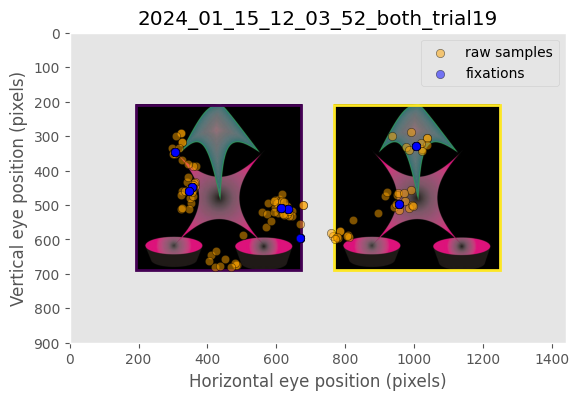

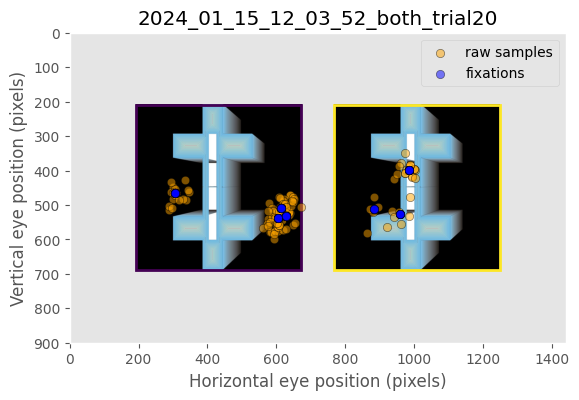

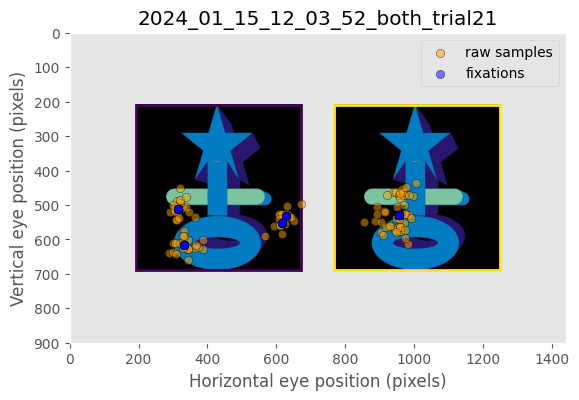

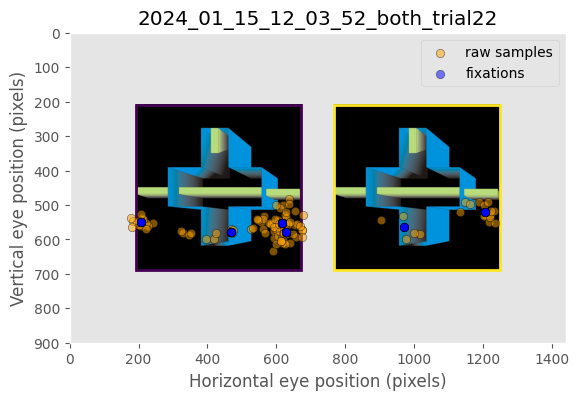

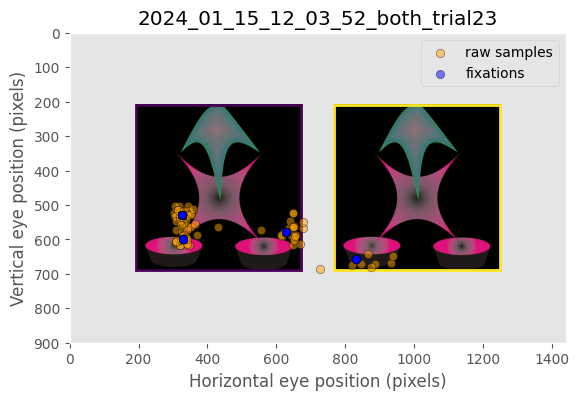

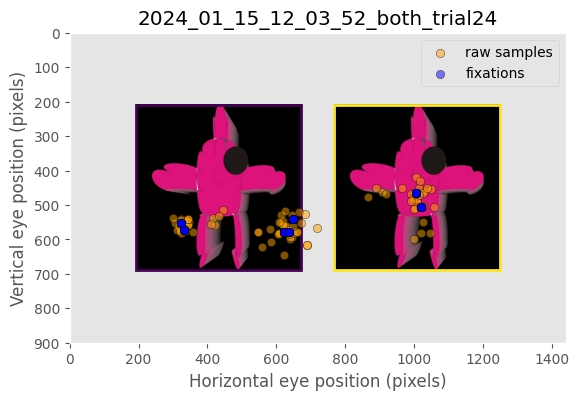

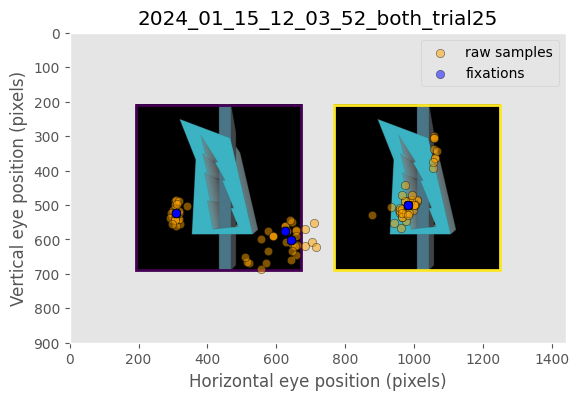

In [3]:
WHERE ='Home' # 'Office' 'Home'

# Path to data folders
if WHERE == 'Home':
    path = 'C:/Users/aby600/Dropbox/Appliedwork/CognitiveSolutions/Projects/DeepEye/TechnicalReports/TechnicalReport1/Test_PreferentialViewing/Pilot_PreferentialViewing/Young/Approved'
else:
    path = 'D:/Dropbox/Appliedwork/CognitiveSolutions/Projects/DeepEye/TechnicalReports/TechnicalReport1/Test_PreferentialViewing/Pilot_PreferentialViewing/Young/Approved'


# Define the AOI padding in pixels
padding = 0  # padding of AOI on each side, used in plot2D() and addAOI()

def create_directory_if_not_exists(directory_path):
    try:
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' was created.")
    except FileExistsError:
        # The directory already exists, no need to create it.
        print(f"Directory '{directory_path}' already exists.")

# define data analysis directories and create them if they don't exist yet
path_to_data = os.path.join(path, 'data')
path_to_analysis = os.path.join(path, 'analysis_new')
create_directory_if_not_exists(path_to_analysis)

# Initialize an empty list to hold the analyzed dataframes
output_dfs = []

# get all folder names
folder_names = os.listdir(path_to_data)

# read and process datafile with fixations (_extra) for each participant
for fn in folder_names:
    path_to_file = os.path.join(path_to_data, fn, fn+'_record_extra.csv')
    
    print(f'Processing participant {fn}...')
        
    try:
        df = pd.read_csv(path_to_file)        
    except:
        print('File does not exist: ' + path_to_file)
        continue      


    # Extract only samples when the target was presented
    df1 = df[df.event=='target_on']

    # Specify the padding for AOI
    df1['padding'] = padding
    
    # Add subject ID to the dataframe to filter later
    df1['deepeye_id'] = fn

     # Add image dimensions (width, height) to the dataframe
    df1['imageDims'] = [(480, 480)] * len(df1)

    # Add image paths column (where the names of the images are) to the dataframe
    df1['image_paths'] = df1.apply(lambda row: [row.imageLeft, row.imageRight], axis=1)

    # Add image coordinates to the dataframe
    df1['image_coords'] = df1.apply(lambda row: [(row.leftX, row.Y, row.imageDims[0], row.imageDims[1]),
                                                     (row.rightX, row.Y, row.imageDims[0], row.imageDims[1])], axis=1)

    # Add bboxes coordinates and bboxes names to the dataframe (since they were not provided in the original data)
    df1['bboxes'] = df1.apply(lambda row: [[row.leftX, row.Y, row.imageDims[0], row.imageDims[1]], [row.rightX, row.Y, row.imageDims[0], row.imageDims[1]]], axis=1)
    df1['bboxesNames'] = df1.apply(lambda row: ['left', 'right'], axis=1) 

    # Plotting 2D fixations      
    plot2d(df1, fn, path_to_analysis, condition='locStudiedImage', save=False)
            
    # df1 = getFixationLatency(df1)
    # df1 = handle_carryover_fixations_and_merge(df1, max_event_duration=4000) # specify the maximum duration of the event in ms
    # df1 = addAOI(df1)
    
    # Accumulate analyzed data across participants
    output_dfs.append(df1)
       
output_df = pd.concat(output_dfs)
output_df.to_csv(os.path.join(path_to_analysis, 'allSubjects_PV_Young.csv'), index=False)


## Calculate novelty index

In [ ]:
# testPhase_df = pd.read_csv(os.path.join(path_to_analysis, 'allSubjects_PV_Young.csv'))

testPhase_df = output_df

# Select only test phase
testPhase_df = testPhase_df[testPhase_df.phase=='test']

# Label the fixations on left or right side
testPhase_df['FixatedNovel'] = np.where(testPhase_df.AOI_stim == testPhase_df.locStudiedImage, 'old', 
                                        np.where(testPhase_df.AOI_stim == 'None', 'None', 'novel'))






In [5]:
novelty_data = []

# Iterate through participants and trials
for (deepeye_id, trialNr), group in testPhase_df.groupby(['deepeye_id','trialNr']):
    
    # Safely compute the proportion of novel fixations (fixCountProp)
    fix_count_total = group.FixatedNovel.count()
    fix_count_novel = group.FixatedNovel[group.FixatedNovel == 'novel'].count()
    novelty_fix_count_prop = fix_count_novel / fix_count_total if fix_count_total != 0 else 0
    
    # Safely compute the proportion of fixation durations (fixDurProp)
    fix_dur_total = group.FixDur.sum()
    fix_dur_novel = group.FixDur[group.FixatedNovel == 'novel'].sum()
    novelty_fix_dur_prop = fix_dur_novel / fix_dur_total if fix_dur_total != 0 else 0
    
    # Append the results to a list
    novelty_data.append([deepeye_id, trialNr, novelty_fix_count_prop, novelty_fix_dur_prop])

# Convert list to DataFrame
novelty_df = pd.DataFrame(novelty_data, columns=['deepeye_id', 'trialNr', 'noveltyIdx_fixCountProp', 'noveltyIdx_fixDurProp'])

# Merge additional data into novelty_df
additional_columns = ['deepeye_id', 'trialNr', 'pp_id', 'imageLeft', 'imageRight', 'locStudiedImage']  # List the columns you want to keep

# Drop duplicates to avoid having repeated rows during merge
testPhase_unique_df = testPhase_df[additional_columns].drop_duplicates(subset=['deepeye_id', 'trialNr'])

# Merge the novelty dataframe with additional information
novelty_df = novelty_df.merge(testPhase_unique_df, on=['deepeye_id', 'trialNr'], how='left')

# Save the output file
novelty_df.to_csv(os.path.join(path_to_analysis, 'allSubjects_NoveltyIndex.csv'), index=False)


In [ ]:


# filter out excluded participants
# '2024_01_15_14_19_20' was the second time, '2024_01_26_17_16_28' too few frames, '2024_01_15_11_44_18' & '2024_01_26_13_09_05'keep fixating the center, 
novelty_df = novelty_df[~novelty_df['deepeye_id'].isin(['2024_01_15_14_19_20', '2024_01_26_17_16_28', '2024_01_15_11_44_18', '2024_01_26_13_09_05'])]

total_count = novelty_df.groupby(['deepeye_id']).noveltyIdx_fixCountProp.count()
fixCountProp = novelty_df.groupby(['deepeye_id']).noveltyIdx_fixCountProp.mean()
fixDurProp = novelty_df.groupby(['deepeye_id']).noveltyIdx_fixDurProp.mean()

print(total_count)
print(fixCountProp)
print(fixDurProp)
print(fixCountProp.mean())
print(fixDurProp.mean())
